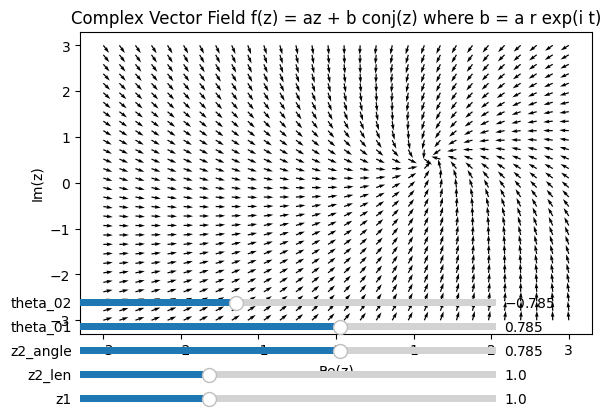

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np

# Define the complex vector field function
def uv_f(Z, a_re, a_im, b_re, b_im = 0):
    f = (a_re + 1j * a_im) * Z + (b_re + 1j * b_im)
    f = f / np.abs(f)

    return np.real(f), np.imag(f)

def get_params(z1, z2_len, z2_angle, theta_01, theta_02):
    lhs = np.array([
        [z1 * np.tan(theta_01), -z1, np.tan(theta_01)],
        [z2_len * np.cos(z2_angle), -z2_len * np.sin(z2_angle), 1],
        [z2_len * np.sin(z2_angle), z2_len * np.cos(z2_angle), 0]
    ])
    rhs = np.array([0, np.cos(theta_02), np.sin(theta_02)])

    soln = np.linalg.solve(lhs, rhs)
    a_re = soln[0]; a_im = soln[1]; b_re = soln[2]
    return a_re, a_im, b_re

# Generate the grid of points
num_coor = 30  # Number of axes directions

X = np.linspace(-3, 3, num_coor)
Y = np.linspace(-3, 3, num_coor)

X, Y = np.meshgrid(X, Y)    
Z = X + 1j * Y

# Parameters
z1 = 1 
z2_len = 1
z2_angle = np.pi / 4
theta_01 = np.pi / 4
theta_02 = -np.pi / 4

a_re, a_im, b_re = get_params(z1, z2_len, z2_angle, theta_01, theta_02)

# Calculate the initial vector field
U, V = uv_f(Z, a_re, a_im, b_re)

# Create the plot
fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.set_title('Complex Vector Field f(z) = az + b conj(z) where b = a r exp(i t)')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')

# Adjust the subplots region to leave some space for the sliders
plt.subplots_adjust(left=0.1, bottom=0.25)

# Add sliders for r and t
ax_z1 = plt.axes([0.1, 0.1, 0.65, 0.03])
ax_z2_len = plt.axes([0.1, 0.15, 0.65, 0.03])
ax_z2_angle = plt.axes([0.1, 0.2, 0.65, 0.03])
ax_theta_01 = plt.axes([0.1, 0.25, 0.65, 0.03])
ax_theta_02 = plt.axes([0.1, 0.3, 0.65, 0.03])

slider_z1 = Slider(ax_z1, 'z1', 0.1, 3, valinit=z1)
slider_z2_len = Slider(ax_z2_len, 'z2_len', 0.1, 3, valinit=z2_len)
slider_z2_angle = Slider(ax_z2_angle, 'z2_angle', -np.pi, np.pi, valinit=z2_angle)
slider_theta_01 = Slider(ax_theta_01, 'theta_01', -np.pi, np.pi, valinit=theta_01)
slider_theta_02 = Slider(ax_theta_02, 'theta_02', -np.pi, np.pi, valinit=theta_02)

# Update function to be called when sliders are changed
def update(val):
    z1 = slider_z1.val
    z2_len = slider_z2_len.val
    z2_angle = slider_z2_angle.val
    theta_01 = slider_theta_01.val
    theta_02 = slider_theta_02.val
    
    a_re, a_im, b_re = get_params(z1, z2_len, z2_angle, theta_01, theta_02)
    U, V = uv_f(Z, a_re, a_im, b_re)
    q.set_UVC(U, V)
    fig.canvas.draw_idle()

# Connect the update function to the sliders
slider_z1.on_changed(update)
slider_z2_len.on_changed(update)
slider_z2_angle.on_changed(update)
slider_theta_01.on_changed(update)
slider_theta_02.on_changed(update)

plt.show()
